In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
file = '../../../../../../dataframes/enigh/HOGARES/df_transform_cat_to_num.csv'

In [3]:
df <- read.csv(file = file)
data <- df
head(data)

num_trab_d,acc_alim1,acc_alim2,acc_alim3,acc_alim4,acc_alim5,acc_alim6,alim17_1,alim17_2,alim17_3,⋯,regalos,remunera,transferen,parto_g,embarazo_g,negcua,est_alim,est_trans,bene_licon,diconsa
0,1,1,1,1,1,1,1.0000000,0.1428571,0.4285714,⋯,0.5366417,1.0000000,1.0000000,1,1,1.00000000,0.06000000,0.141129032,1,0.1996538
0,1,1,1,1,1,1,1.0000000,0.4285714,0.4285714,⋯,0.5366417,1.0000000,0.3035199,1,1,1.00000000,0.02571429,0.004032258,1,0.1996538
0,1,1,1,1,1,1,0.5714286,0.2857143,1.0000000,⋯,0.5366417,1.0000000,1.0000000,1,1,1.00000000,0.04857143,0.070564516,1,0.1996538
0,1,1,1,1,1,1,0.4285714,0.1428571,0.5714286,⋯,1.0000000,0.1442585,1.0000000,1,1,1.00000000,0.03428571,0.060483871,1,1.0000000
0,1,1,1,1,1,1,1.0000000,1.0000000,1.0000000,⋯,0.5366417,1.0000000,0.3035199,1,1,1.00000000,0.08857143,0.060483871,1,0.7853433
0,1,1,1,1,1,1,1.0000000,0.1428571,1.0000000,⋯,1.0000000,1.0000000,1.0000000,1,1,0.03923832,0.09428571,0.483870968,1,0.1996538


In [4]:
ncol(data)

[1] 75

In [5]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [6]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
num_trab_d,0.0559230
acc_alim1,0.5838834
acc_alim2,0.2333031
acc_alim3,0.4507160
acc_alim4,0.4731912
acc_alim5,0.2736092


In [7]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
72,est_alim,4.319120
73,est_trans,3.310052
47,anio_estuf,3.282109
45,anio_refri,3.204282
49,anio_lavad,3.111690
41,anio_licua,3.033139


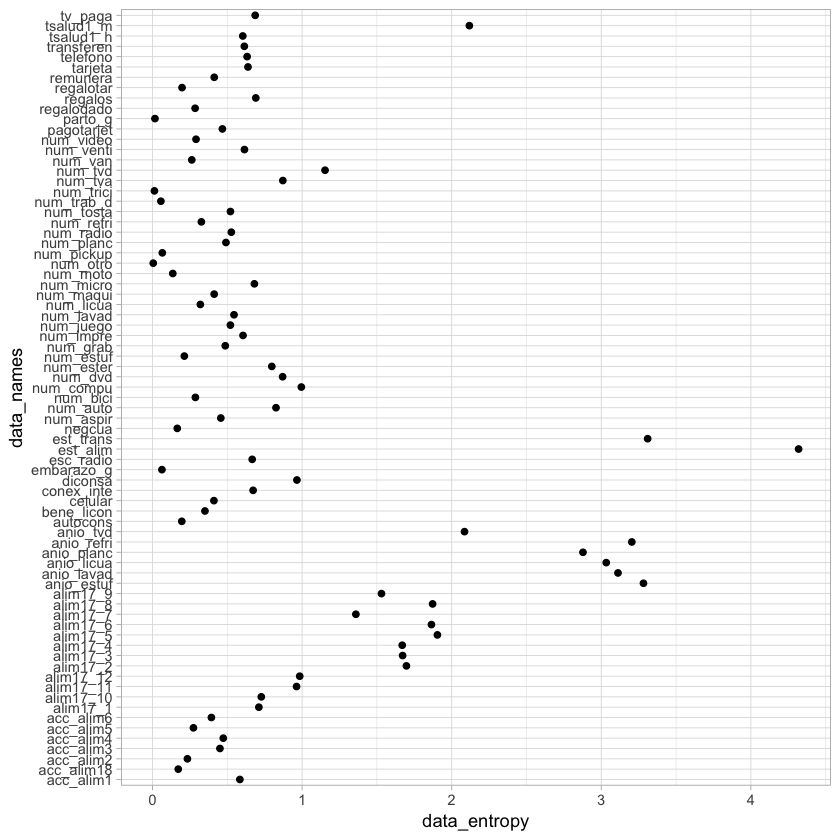

In [8]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

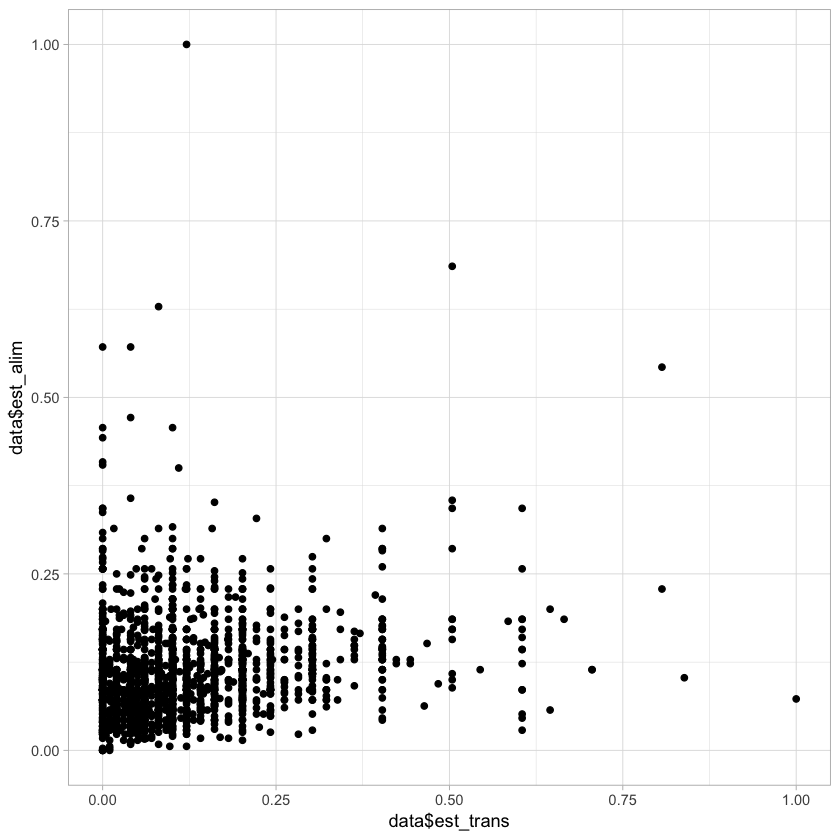

In [9]:
ggplot(data = data, 
       aes(y=data$est_alim, 
           x=data$est_trans)) + geom_point() + theme_light()

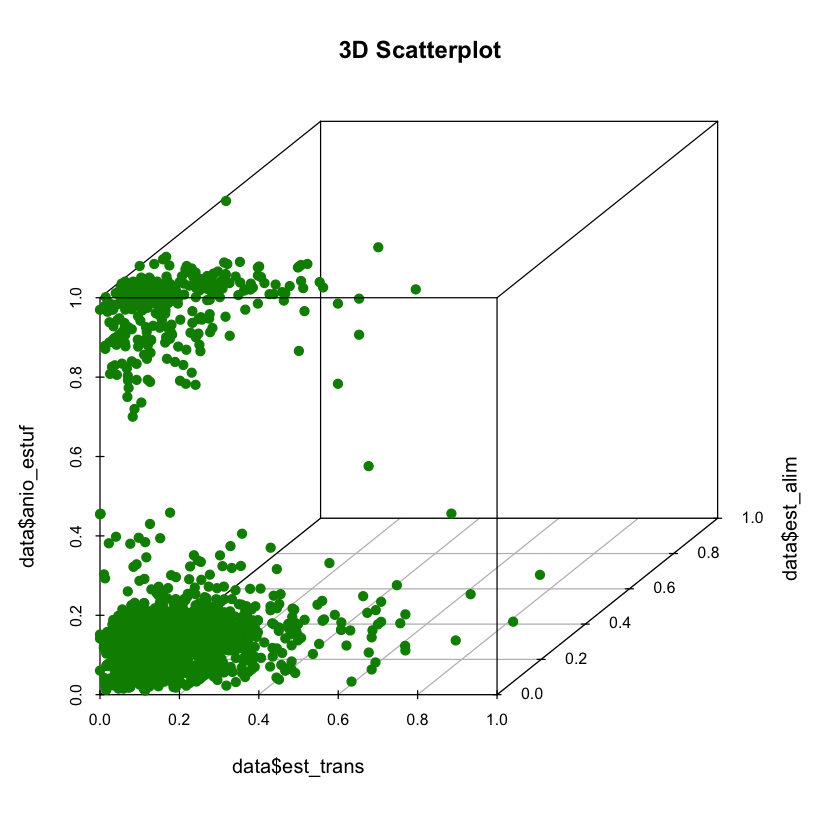

In [10]:
scatterplot3d(y=data$est_alim, 
              x=data$est_trans,
              z=data$anio_estuf, pch = 19, color = "green4", main="3D Scatterplot")

In [11]:
file = '../../../../../../dataframes/enigh/HOGARES/df_entropy_tranform_cat_to_num.csv'

In [12]:
write.csv(order_df_entropy, 
          file = file,
          row.names=FALSE)
